## Import the main Libraries

In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 

## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

## Load the Dataset and Look at the big Picture

In [2]:
FILE_PATH=os.path.join(os.getcwd(),'housing.csv')
df_housing=pd.read_csv(FILE_PATH)
df_housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
df_housing.isna().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

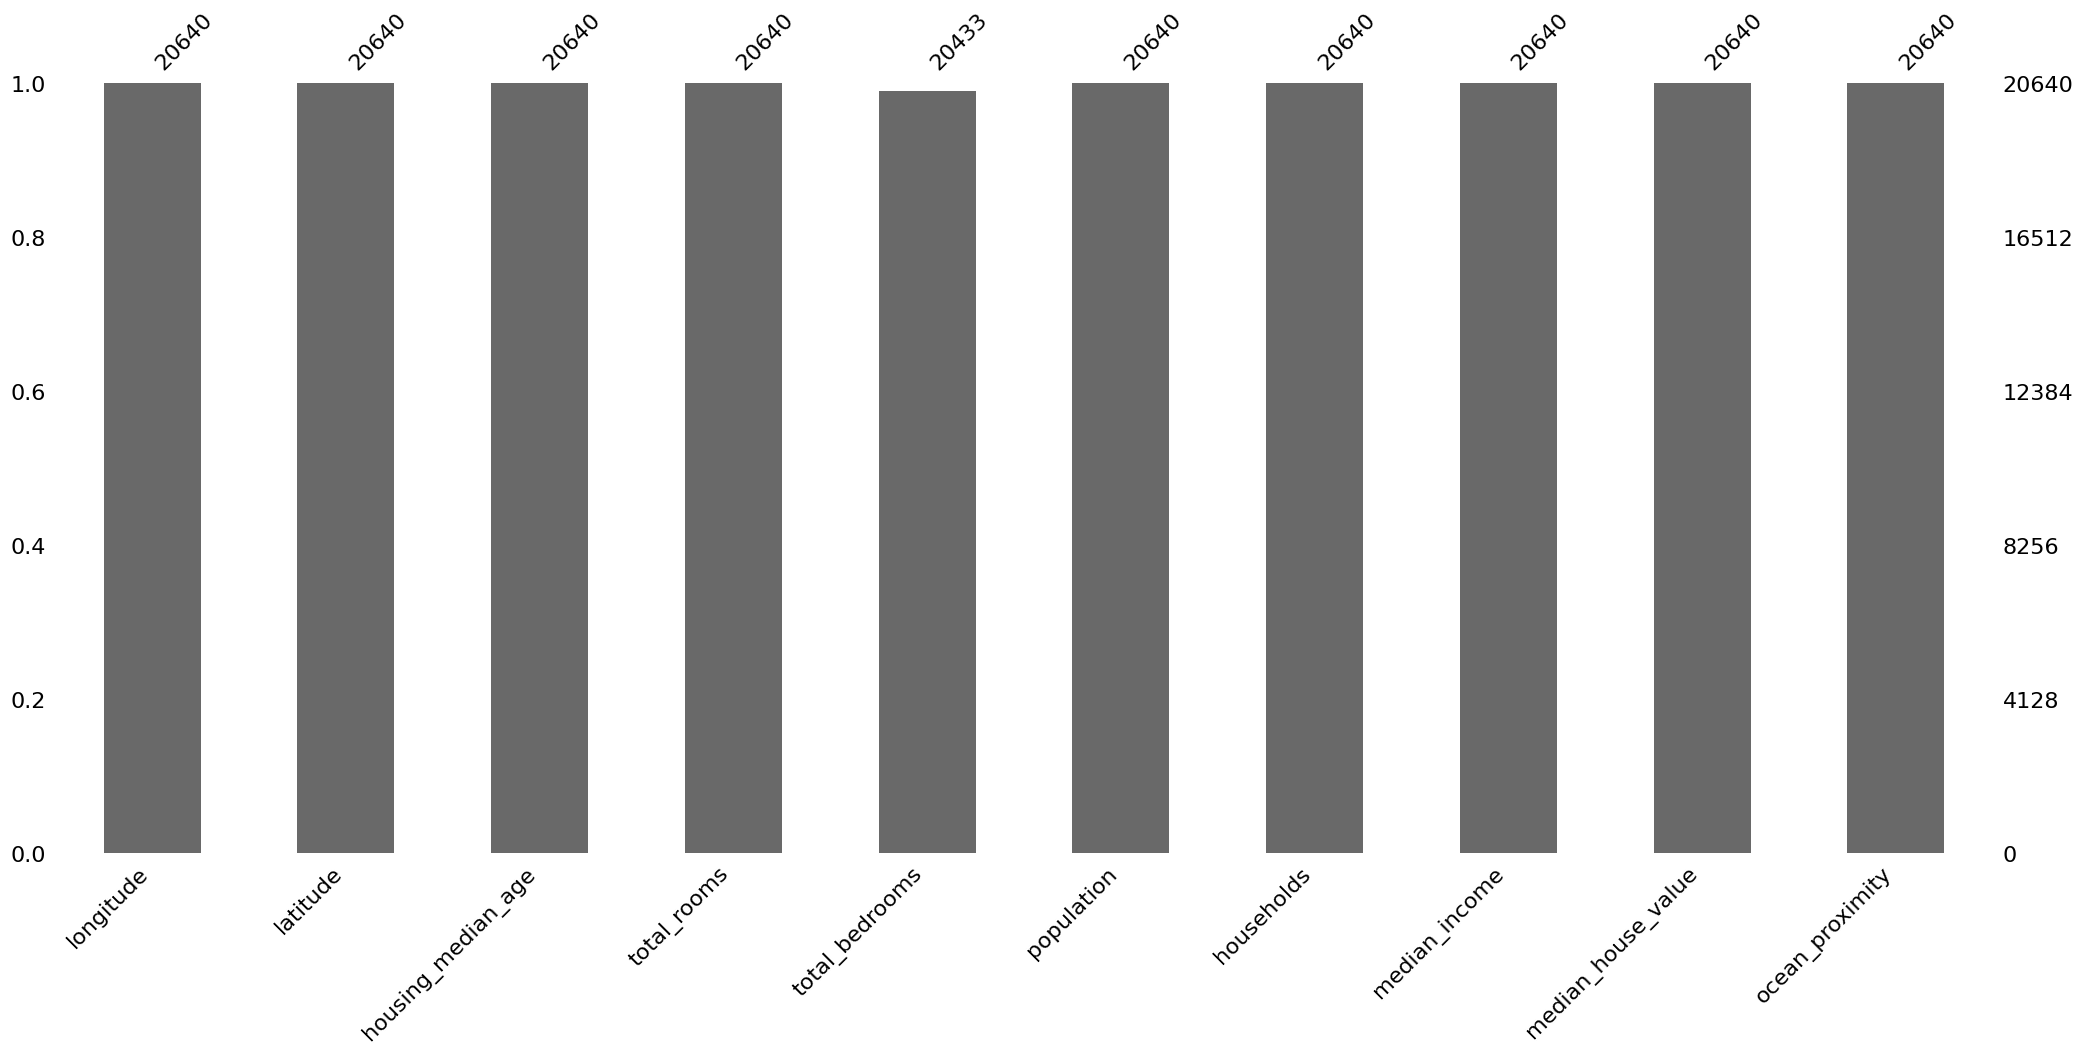

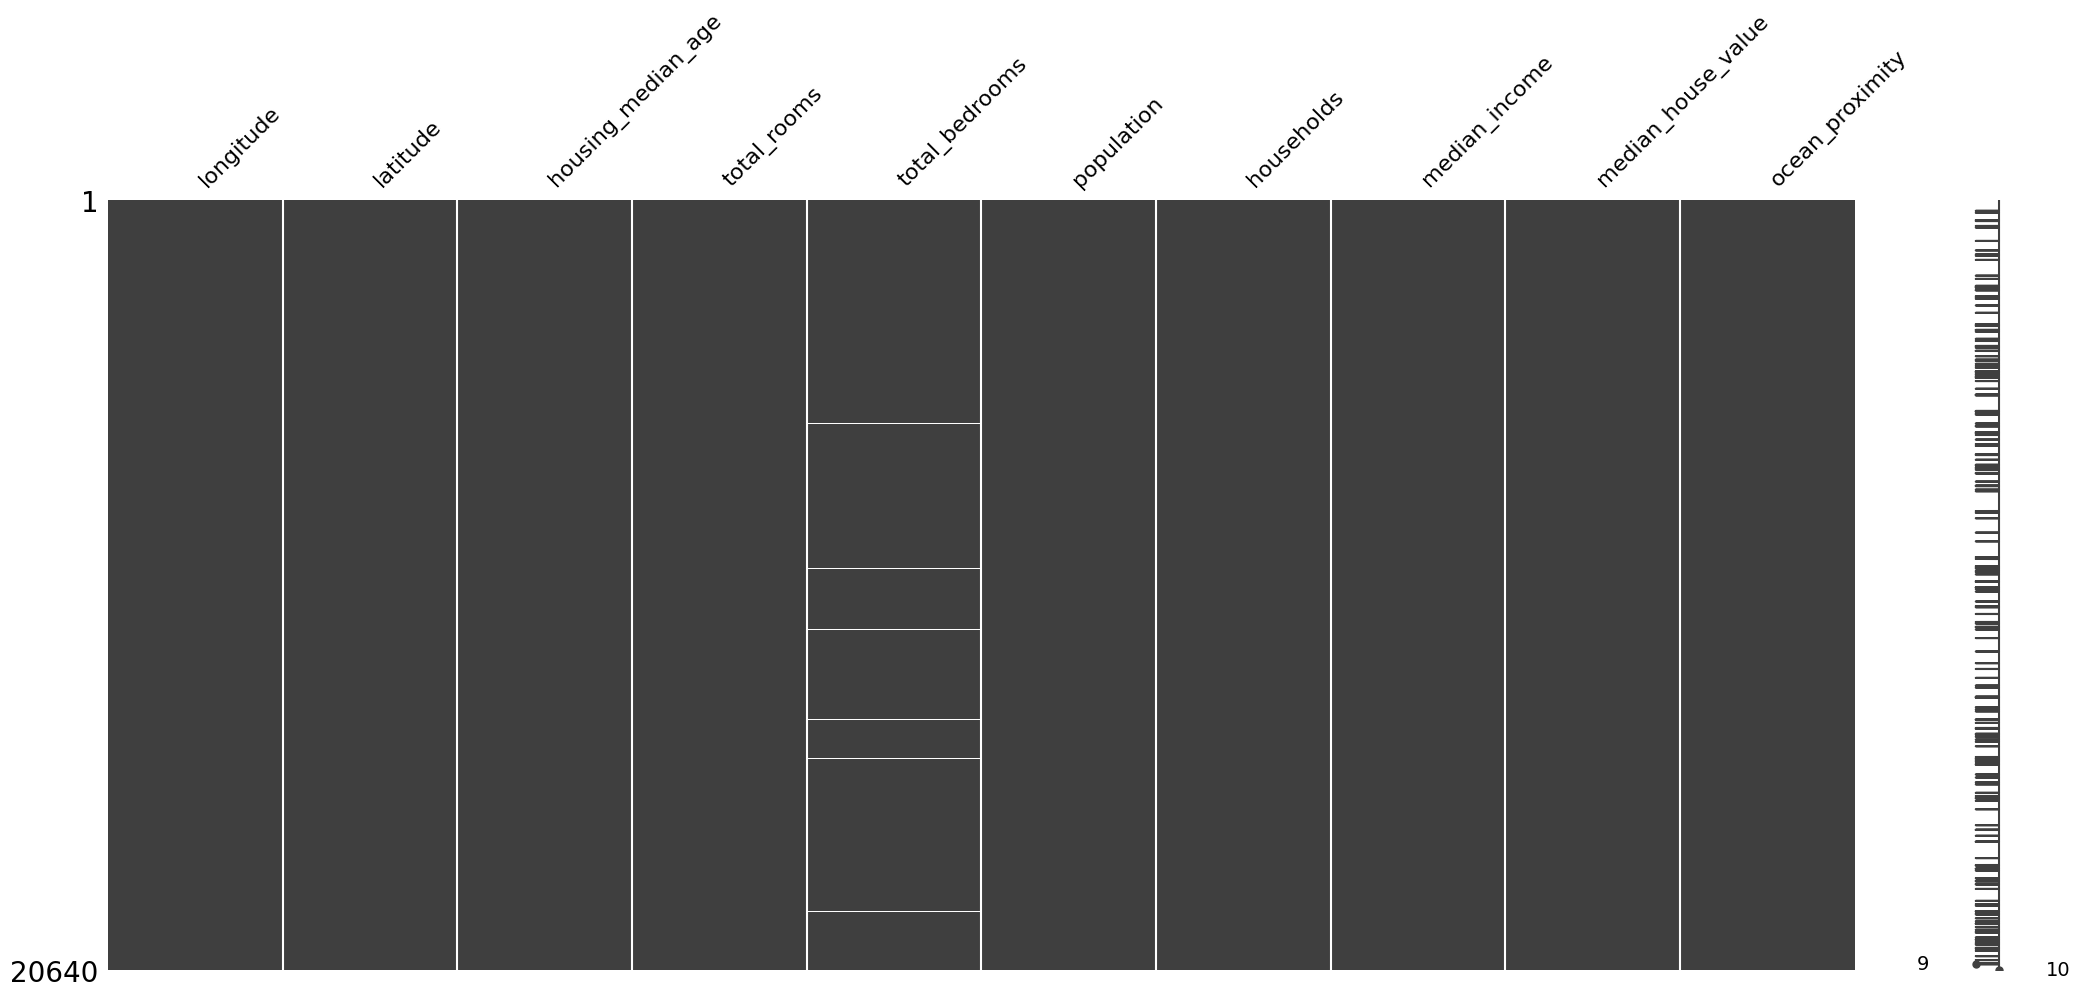

In [6]:
missingno.bar(df_housing);
missingno.matrix(df_housing);


## Exploratory Data Analysis


## Univariate Visualization


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64
********************************************************************************


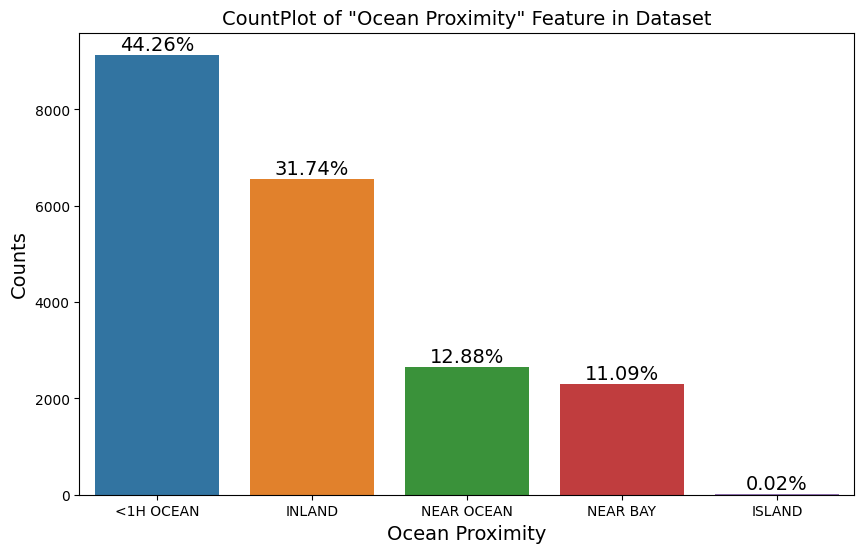

In [7]:
ocean_values=df_housing['ocean_proximity'].value_counts()
print(ocean_values)
print("**"*40)
plt.figure(figsize=(10,6))
sns.countplot(x='ocean_proximity',data=df_housing,order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=14)
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
for i in range(len(ocean_values)):
    each_count=ocean_values.values[i]
    each_text=f'{((100*each_count)/len(df_housing)):.2f}%'
    plt.text(x=i,y=each_count+100,s=each_text, fontsize=14, ha='center')
plt.show()

In [8]:
df_housing['ocean_proximity']=df_housing['ocean_proximity'].replace('<1H OCEAN','1H OCEAN' )
print(df_housing['ocean_proximity'].unique())
 

['NEAR BAY' '1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


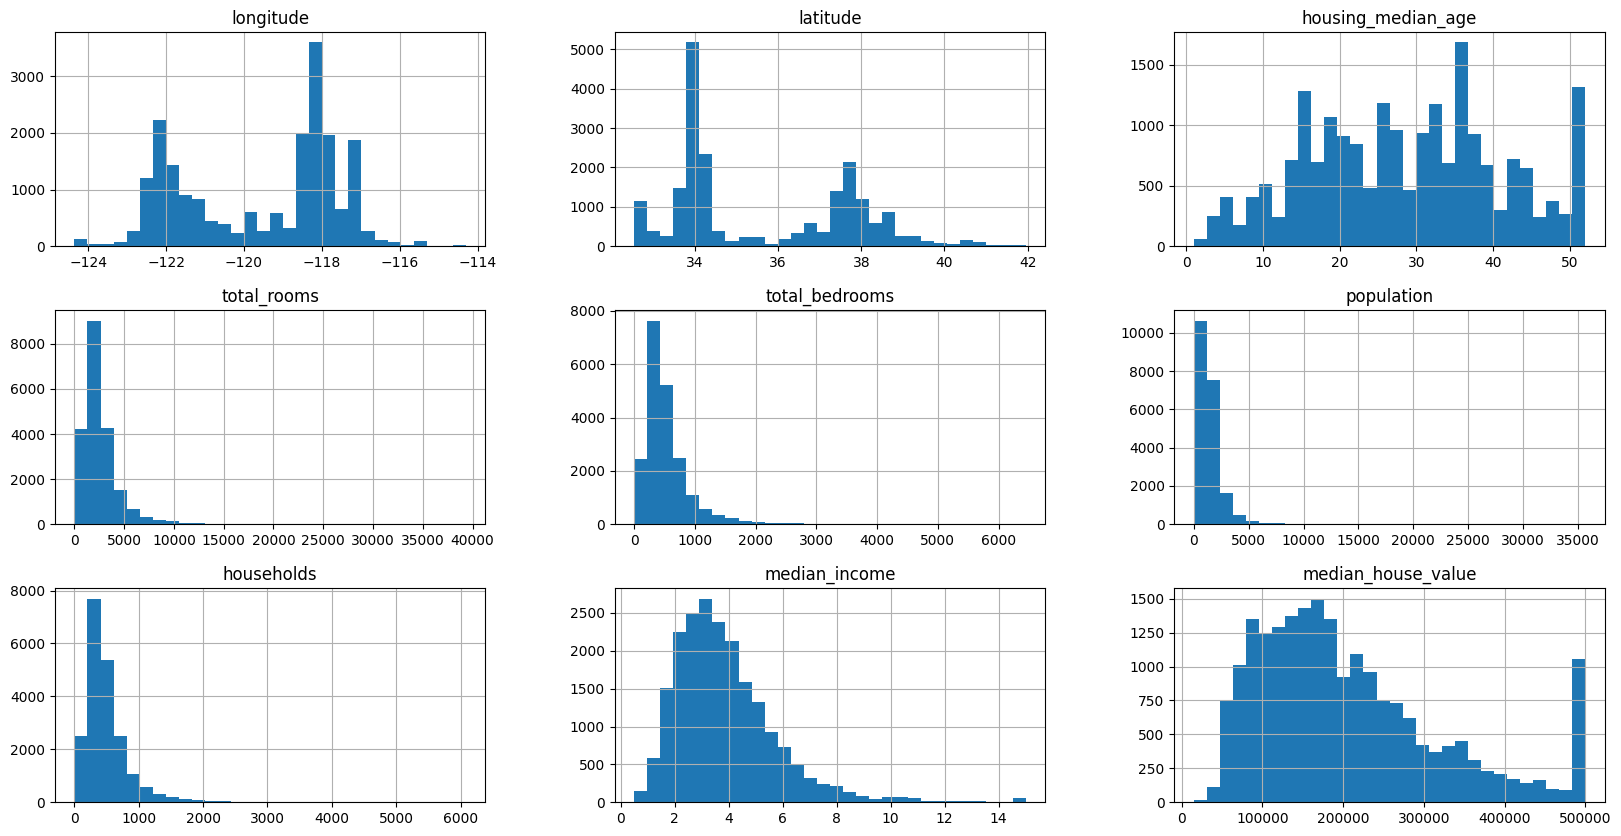

In [9]:
df_housing.hist(bins=30, figsize=(20, 10))
plt.show()

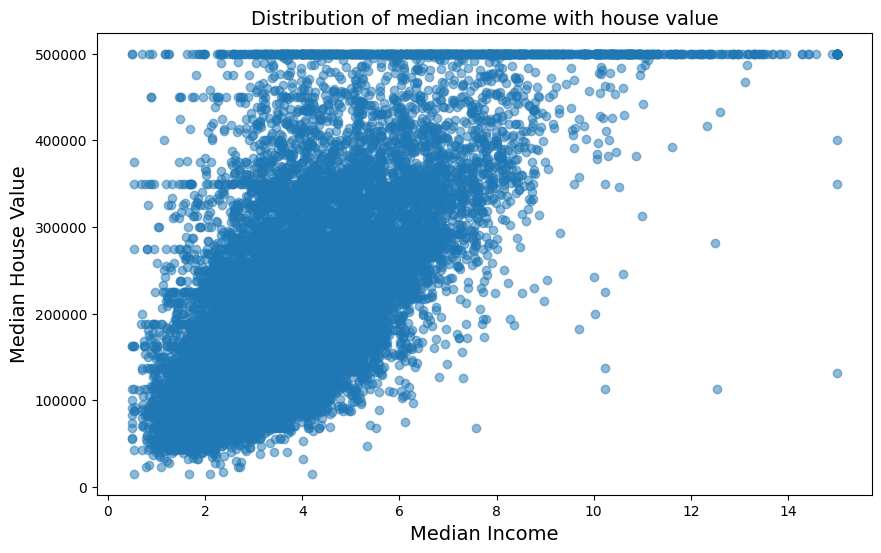

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(df_housing['median_income'], df_housing['median_house_value'], alpha=0.5)
plt.title('Distribution of median income with house value', fontsize=14  )
plt.xlabel('Median Income', fontsize=14)
plt.ylabel('Median House Value', fontsize=14)
plt.show()

In [11]:
df_housing['median_house_value'].describe()

count     20640.000000
mean     206855.816909
std      115395.615874
min       14999.000000
25%      119600.000000
50%      179700.000000
75%      264725.000000
max      500001.000000
Name: median_house_value, dtype: float64

In [12]:
house_value_bins=pd.cut(x=df_housing['median_house_value'],bins=[-np.inf,100000,200000,300000,400000,500000,np.inf],
                                                         labels=['0-100k', '100k-200k', '300k-400k', '400k-500k', '500k-600k', '600k<'])


#house_value_bins.describe()
#house_value_bins


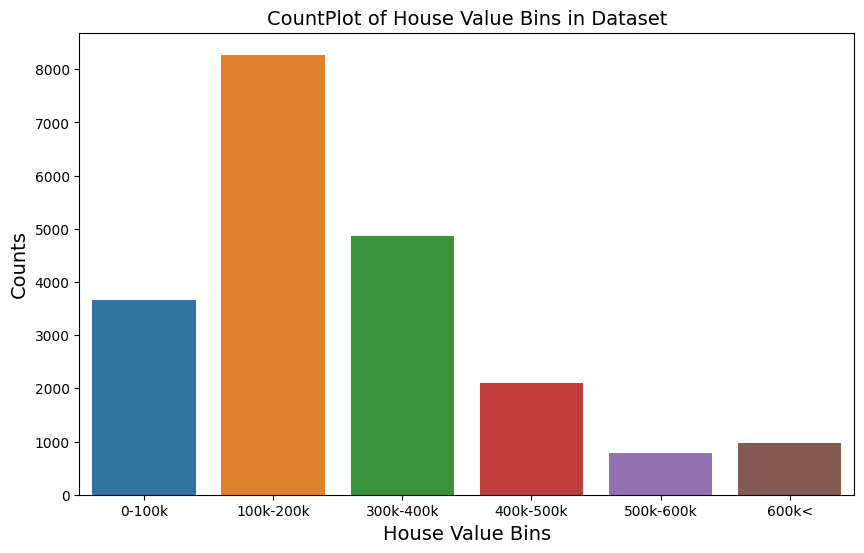

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x=house_value_bins)
plt.title('CountPlot of House Value Bins in Dataset', fontsize=14, c='k')
plt.xlabel('House Value Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

In [14]:
df_housing['median_income'].describe()


count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [17]:
 income_bins = pd.cut(x=df_housing['median_income'], 
                     bins=[-np.inf, 1.5, 3, 4.5, 6, np.inf], 
                     labels=['0-1.5', '1.5-3', '3-4.5', '4.5-6', '6<'])


  

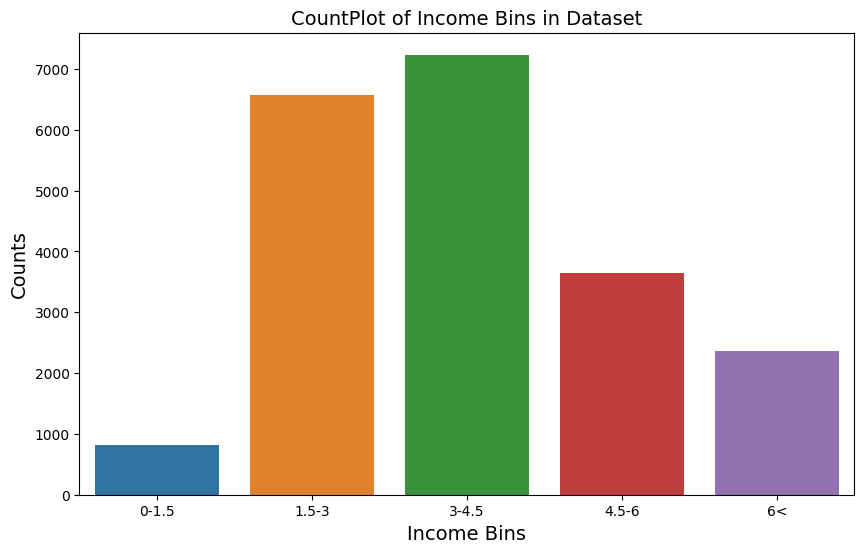

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x=income_bins)
plt.title('CountPlot of Income Bins in Dataset', fontsize=14, c='k')
plt.xlabel('Income Bins', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

## Bivariate Visualization

C:\Users\Softlaptop\.conda\envs\Project\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


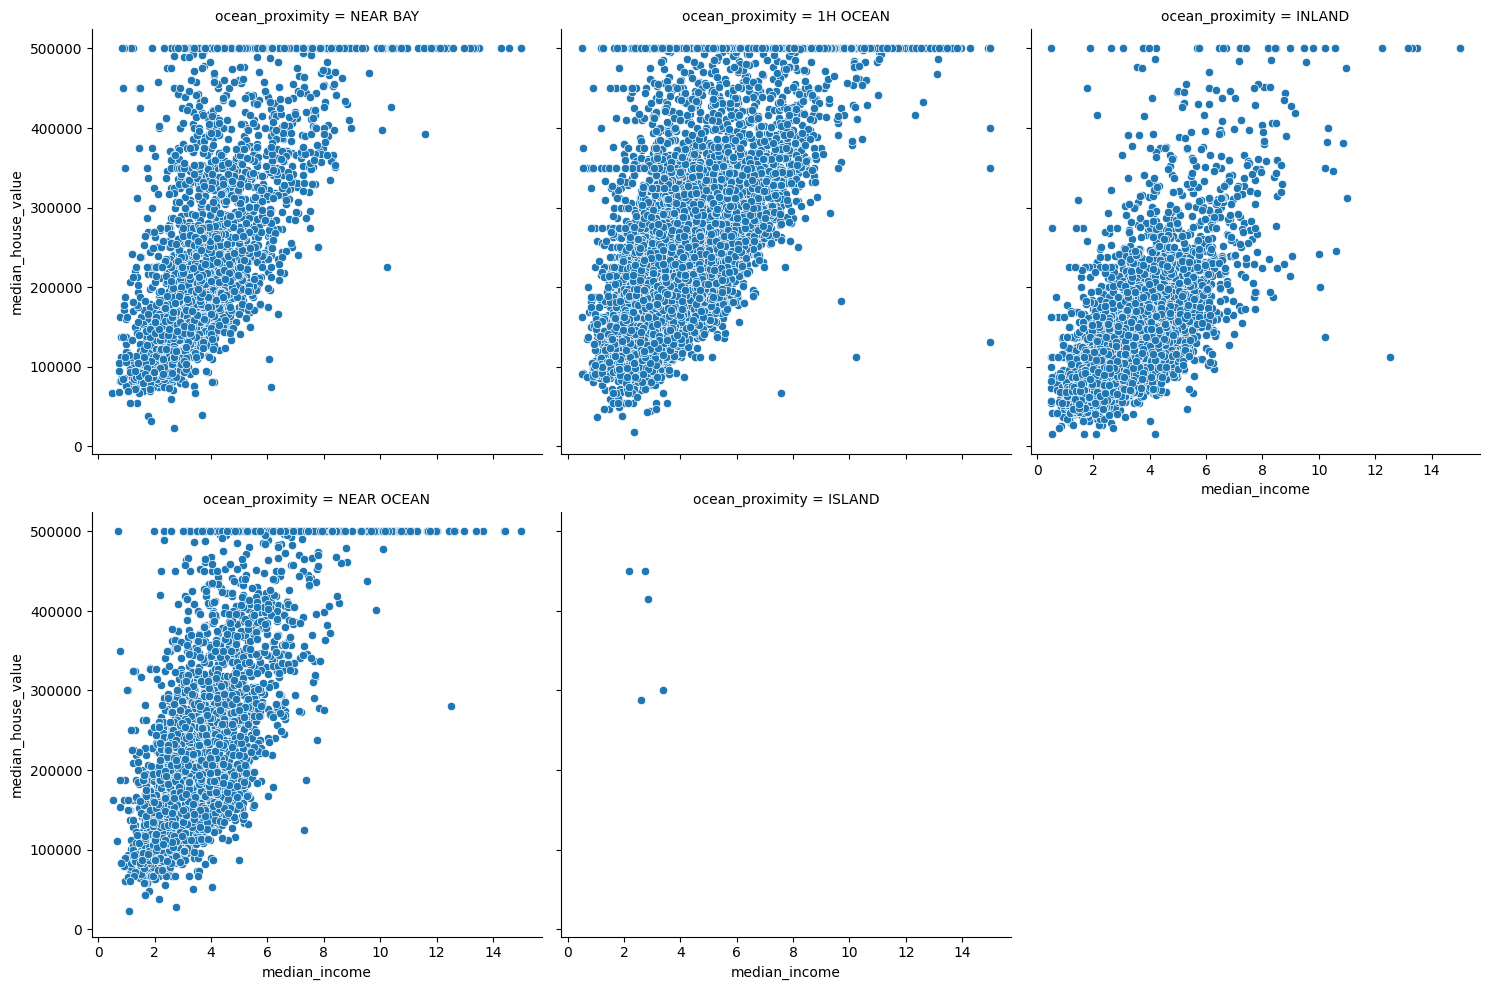

In [19]:
sns.relplot(x='median_income', y='median_house_value', data=df_housing, kind='scatter', 
            col='ocean_proximity', col_wrap=3)
plt.show()

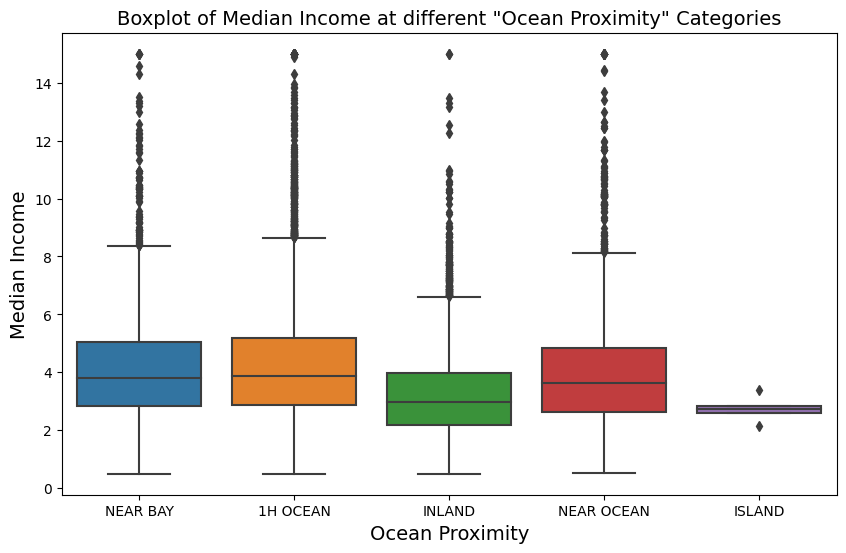

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_income', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median Income at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median Income', fontsize=14, c='k')
plt.show()

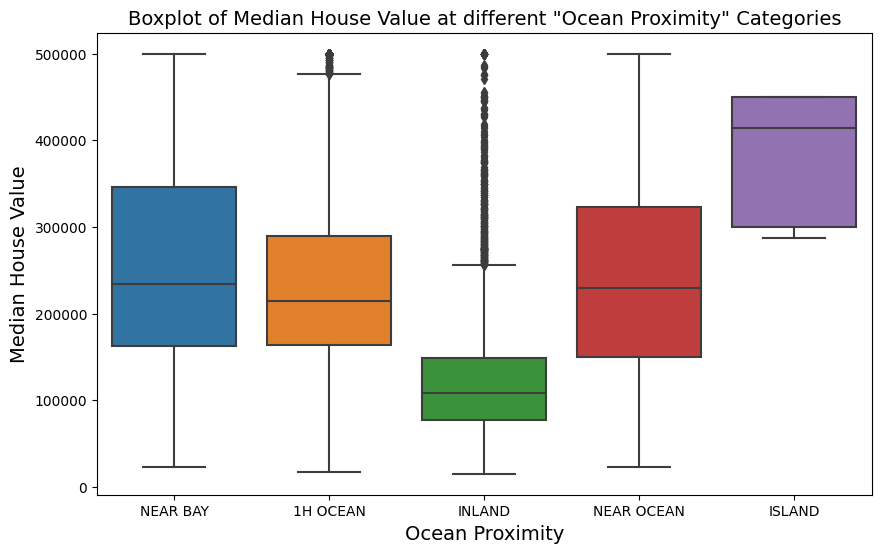

In [21]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='median_house_value', data=df_housing, x='ocean_proximity')
plt.title('Boxplot of Median House Value at different "Ocean Proximity" Categories', fontsize=14, c='k')
plt.xlabel('Ocean Proximity', fontsize=14, c='k')
plt.ylabel('Median House Value', fontsize=14, c='k')
plt.show()

## Multivariate Visualization

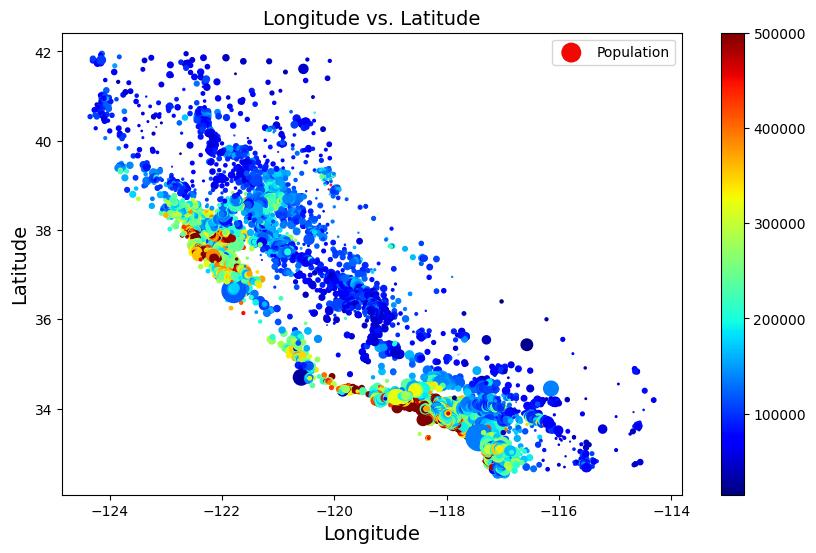

In [22]:
plt.figure(figsize=(10,6))
sc = plt.scatter(x=df_housing['longitude'], y=df_housing['latitude'], 
                 s=df_housing['population']/100, c=df_housing['median_house_value'], 
                 cmap=plt.get_cmap('jet'), label='Population') 
plt.colorbar(sc)   ## colorbar
plt.xlabel('Longitude', fontsize=14, c='k')
plt.ylabel('Latitude', fontsize=14, c='k')
plt.title('Longitude vs. Latitude', fontsize=14, c='k')
plt.legend()
plt.show()

### Check the Correlation between the Features and Target

In [25]:
#df_housing=pd.DataFrame(df_housing)
df_housing_new=df_housing.drop(['ocean_proximity'],axis=1)
df_housing_new.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [26]:
df_housing_new.corr()
df_housing_new.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

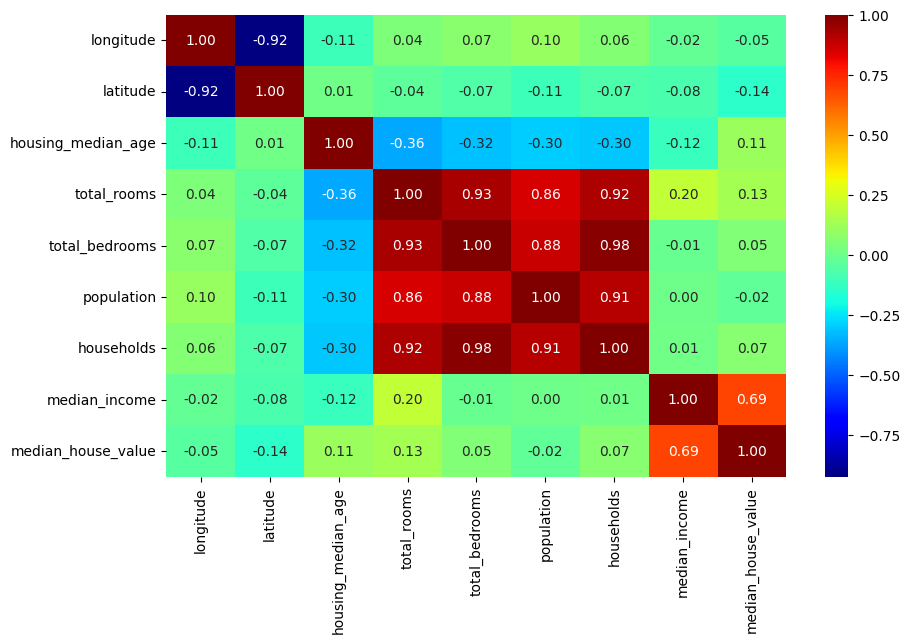

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_housing_new.corr(), annot=True, cmap='jet', fmt='.2f')  ## symmetric matrix
plt.show()

## Feature Engineering

In [28]:
df_housing['rooms_per_household'] = df_housing['total_rooms'] / df_housing['households']
df_housing['bedroms_per_rooms'] = df_housing['total_bedrooms'] / df_housing['total_rooms']
df_housing['population_per_household'] = df_housing['population'] / df_housing['households']

In [29]:
df_housing_new.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Split the Dataset

I will split the Dataset using ordinary method (random method) not (Stratified method)

In [30]:
X = df_housing.drop(['median_house_value'], axis=1)    
y = df_housing['median_house_value'] 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True, random_state=42)
#shuffle -->to make split random
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)
#x_train should==y_train
#x_test==y_test

X_train shape --  (17544, 12)
y_train shape --  (17544,)
X_test shape --  (3096, 12)
y_test shape --  (3096,)


## Dealing with nulls

In [32]:
#if you have categorical value
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('**'*40)
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedroms_per_rooms', 'population_per_household']
********************************************************************************
Categorical Columns : 
 ['ocean_proximity']


## Pipeline for  Features

In [33]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test) 

C:\Users\Softlaptop\.conda\envs\Project\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [34]:
X_train_final.shape,X_test_final.shape

((17544, 16), (3096, 16))

In [35]:
y_train.shape,y_test.shape

((17544,), (3096,))

## Building ML Models

Evaluation Metric: RMSE

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train )

LinearRegression()

In [37]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE Scores Using LinearRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using LinearRegression --- 67880.1426
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 67898.8887


In [38]:
## define the model --> ## initialize some random Hyperparameter --> we will tune later
sgd_reg = SGDRegressor(penalty='l2', alpha=0.0001, eta0=0.001, shuffle=True, max_iter=10000)  ## with Regularization
sgd_reg.fit(X_train_final, y_train)  ## train the model

SGDRegressor(eta0=0.001, max_iter=10000)

In [39]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_sgd = cross_val_score(estimator=sgd_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_sgd = -1 * rmse_scores_sgd   ## we want it positive
rmse_scores_sgd = np.sqrt(rmse_scores_sgd)
print(f'RMSE Scores Using SGDRegressor --- {np.round(rmse_scores_sgd, 4)}')
print(f'Mean of RMSE Scores Using SGDRegressor --- {rmse_scores_sgd.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_sgd = cross_val_predict(estimator=sgd_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_sgd = np.sqrt(mean_squared_error(y_train, y_pred_sgd))
print(f'RMSE after prediction Using SGDRegressor --- {rmse_pred_sgd:.4f}')  ## almost the same result :D

RMSE Scores Using SGDRegressor --- [66655.015  69262.4257 66584.9375 67066.2995 70365.6254]
Mean of RMSE Scores Using SGDRegressor --- 67986.8606
************************************************************************************************************************
RMSE after prediction Using SGDRegressor --- 68003.7344


In [40]:
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [41]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [66472.689  69222.7453 66350.7247 67031.9174 70323.0198]
Mean of RMSE Scores Using Ridge --- 67880.2192
************************************************************************************************************************
RMSE after prediction Using Ridge --- 67898.9471


In [42]:
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [43]:
lasso_reg.coef_

array([-56166.28650229, -56466.30701119,  13864.90232431,   6112.77503543,
         8937.16731622, -46626.84295639,  36609.7003318 ,  79167.88726091,
         6350.89510096,  16578.08308073,    700.82893968,      0.        ,
       -34479.90501045, 143036.55857524,  -5501.79735044,   3698.19799083])

In [44]:
poly_feat = PolynomialFeatures(degree=2, include_bias=False)   ## try random degrees, MUST be tuned
X_train_poly = poly_feat.fit_transform(X_train_final)

In [45]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [46]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result :D

RMSE Scores Using PolynomialRegression --- [66469.8275 69222.723  66338.7127 67047.6716 70321.7781]
Mean of RMSE Scores Using PolynomialRegression --- 67880.1426
************************************************************************************************************************
RMSE after prediction Using PolynomialRegression --- 67898.8887


In [47]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [48]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [60978.9699 61687.7848 60277.5273 59442.3636 62191.8308]
Mean of RMSE Scores Using KNN --- 60915.6953
************************************************************************************************************************
RMSE after prediction Using KNN --- 60923.5123


In [49]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [50]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [46401.218  48678.5008 48205.3615 46268.9467 48333.7256]
Mean of RMSE Scores Using XGBoost --- 47577.5505
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 47588.5920


In [52]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 200, 50), 'max_depth': np.arange(4, 15, 2), 
                   'learning_rate': [0.1, 0.2], 'subsample': [0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_depth=6, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.2],
                         'max_depth': array([ 4,  6,  8, 10, 12, 14]),
                         'n_estimators': array([100, 150]),
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error', verbose=6)

In [53]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

best_xgb_params --  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.8}
best_xgb --  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [54]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned Tuned XGBoost --- [44577.0097 46753.8341 46620.9049 45085.3031 46345.7689]
Mean of RMSE Scores Using Tuned XGBoost --- 45876.5642
************************************************************************************************************************
RMSE after prediction Using Tuned XGBoost --- 45884.9481


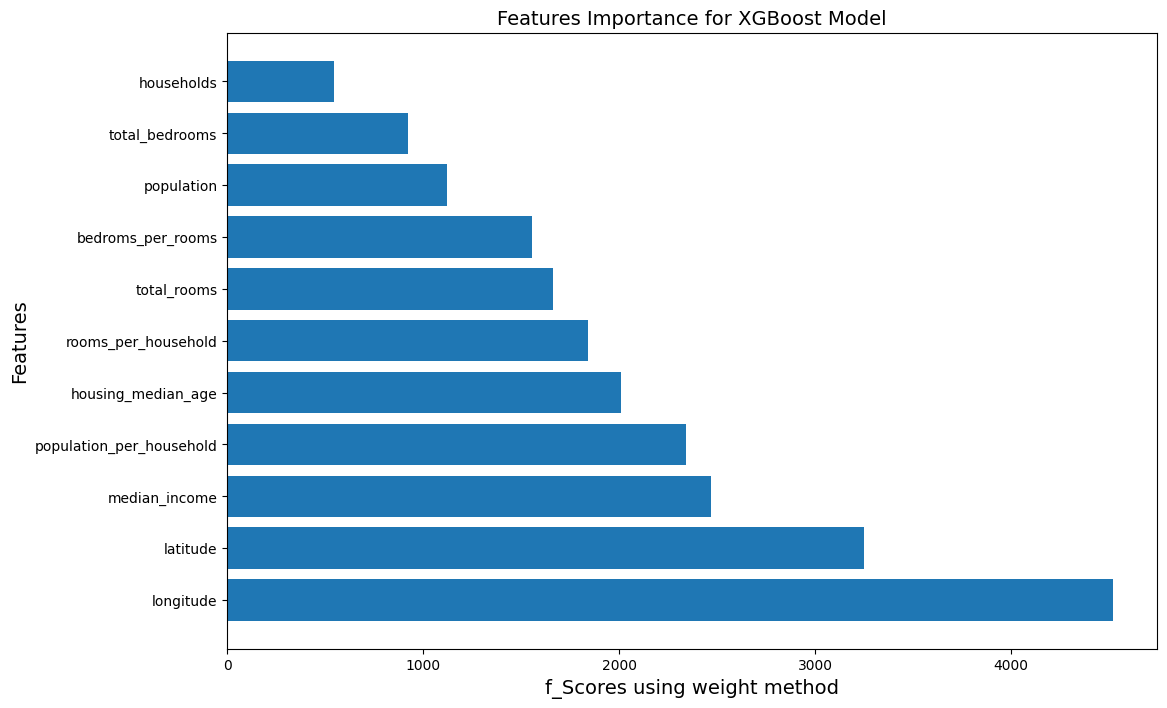

In [55]:
## Using XGBoost to get the Feature Importance
## get and sort 
feat_import_xgb = best_xgb.get_booster().get_score(importance_type='weight')  ## the same as RF, but RF normalize
df_feat_import_xgb = pd.DataFrame.from_dict(feat_import_xgb, orient='index')   ## to DF
df_feat_import_xgb = df_feat_import_xgb.reset_index()
df_feat_import_xgb = df_feat_import_xgb.rename(columns={'index': 'Features', 0:'f_scores'})  ## Some Modification

## Only taking the first 11 Numerical Cols 
df_feat_import_xgb = df_feat_import_xgb[:11]   ## take only the first 11 Numerical Cols

# ## Some Sort to plot
df_feat_import_xgb['Features'] = num_cols
df_feat_import_xgb = df_feat_import_xgb.sort_values(by='f_scores', ascending=False)


## plotting
plt.figure(figsize=(12, 8))
plt.barh(y=df_feat_import_xgb['Features'], width=df_feat_import_xgb['f_scores'])
plt.title('Features Importance for XGBoost Model', fontsize=14, c='k')
plt.xlabel('f_Scores using weight method', fontsize=14, c='k')
plt.xticks(c='k')
plt.yticks(c='k')
plt.ylabel('Features', fontsize=14, c='k')
plt.show()

## Models Comparison

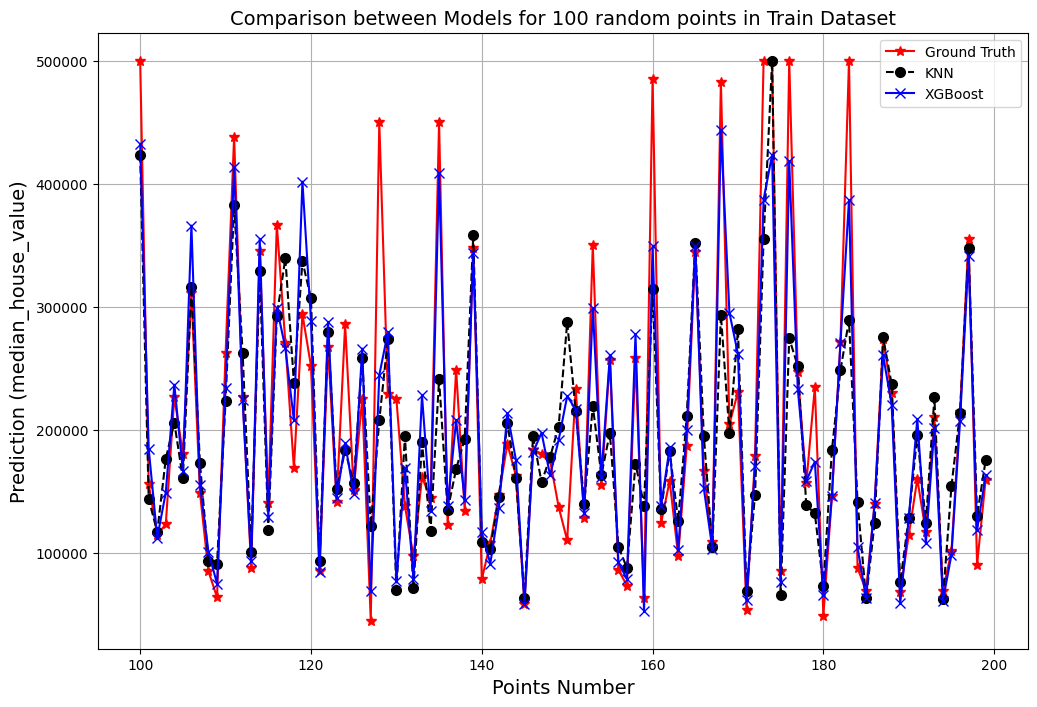

In [56]:
## Plotting
x_x = np.arange(100, 200)  ## random selected points
## Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_x, y_train.values[100:200], 'r*-',  markersize=7, label='Ground Truth')  ## for train
plt.plot(x_x, y_pred_knn[100:200], 'ko--', markersize=7, label='KNN')
plt.plot(x_x, y_pred_tuned_xgb[100:200], 'bx-', markersize=7, label='XGBoost')
plt.title('Comparison between Models for 100 random points in Train Dataset', fontsize=14, color='k')
plt.xlabel('Points Number', fontsize=14, color='k')
plt.ylabel('Prediction (median_house_value)', fontsize=14, color='k')
plt.legend()
plt.grid('on')
plt.show()

### Download the best Model --- best_xgb&KNN

In [64]:
## Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')

['model_XGBoost.pkl']

In [65]:
## to load this pretrained Model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Inference on Test Dataset

In [66]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(X_test_final)  ## Remember X_test_final --> is processed and ready (take care)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   ## Very Good :D

RMSE on test Dataset using XGBoost -- 44640.304


In [67]:
joblib.dump(knn_reg, 'model_knn.pkl')

['model_knn.pkl']

In [68]:
## to load this pretrained Model
loaded_model_k = joblib.load('model_knn.pkl')
loaded_model_k

KNeighborsRegressor(n_neighbors=8)

In [69]:
y_pred_test = loaded_model_k.predict(X_test_final)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using KNN -- {rmse_test:.3f}')   ## not bad:))

RMSE on test Dataset using KNN -- 61315.575
